In [1]:
#import nltk
#nltk.download()

# Sentiment Analysis for Trump Tweets

Importing relevant packages

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk import pos_tag
from nltk import bigrams
from textblob import TextBlob
import operator

## cleanDate
This function takes in the original dataframe and makes the date only show the year as the rest of the data is not relevant.
This funciton returns a list of the newly formatted dates

In [3]:
def cleanDate(dframe):
    dateList = []
     
    tweetYears = list(df['date'])
    for x in range(len(tweetYears)):
        tweetYears[x] = int(tweetYears[x][:4])
            
    
    return tweetYears

## cleanContent
This funciton takes a the original dataframe as input and removes the links from all of the comments as these links are redundant to the calculation of the tweet's sentiment.
This function returns a list of the newly formatted dates

In [4]:
def cleanContent(dframe):
    l = list(dframe['content'])
    newList = []
    for x in range(len(l)):
        if "http" in l[x]:
            sublist = l[x].split()
            for i in range(len(sublist)):
                if "http" in sublist[i]:
                    sublist[i] = ""
            newList.append(' '.join(sublist))
        else:
            newList.append(l[x])
            
    return newList

## SentimentScore
This function is the driving force behind calculating the sentiment values for each tweet. This is then added to the data frame along with a clarification of positives and negative tweets

In [5]:
def SentimentScore(reviewsDataSet):
    
    blob = TextBlob(reviewsDataSet)
    SentimentScore = 0 
    SentimentScore += blob.sentiment.polarity
    Sentiment_Score.append(SentimentScore)
    if SentimentScore > 0:
        return True
    else: 
        return False

df = pd.read_csv('realdonaldtrump.csv')

tweetYears = cleanDate(df)
contentList = cleanContent(df)

df = df.assign(content = contentList)
df = df.assign(date = tweetYears)
df = df.dropna()
positiveReviewCount = 0
negativeReviewCount = 0 
reviewsDataSet = df['content']
Sentiment_Score = []
Sentiment = []


for index, review in enumerate(reviewsDataSet):

    if SentimentScore(review) == False:
        negativeReviewCount += 1
        Sentiment.append("Negative")
    else:
        Sentiment.append("Positive")
        positiveReviewCount += 1      

df1 = df.assign(Sentiment_Score = Sentiment_Score)
df2 = df1.assign(Sentiment = Sentiment)
df2.loc[df2['Sentiment_Score'] == 0, 'Sentiment'] = 'Neutral'

## compute_frequency_of_bigrams
This function computes the bigram frequency (looks for the most common pair of words from trumps tweets) for the most common nouns, pronouns and adjectives

In [6]:
def compute_frequency_of_bigrams(bigrams_with_pos_tags):
    bigrams_with_frequencies = {}
    for first_element, second_element in bigrams_with_pos_tags:
        first_word_of_bigram, first_word_pos_tag = first_element[0], first_element[1]
        second_word_of_bigram, second_word_pos_tag = second_element[0], second_element[1]
        if (first_word_pos_tag == 'JJ' and second_word_pos_tag == 'NN'
           or first_word_pos_tag == 'NN' and second_word_pos_tag == 'NN'
           or first_word_pos_tag == 'NNP' and second_word_pos_tag == 'NNP'
           or first_word_pos_tag == 'NNP' and second_word_pos_tag == 'NN'):
            if (first_word_of_bigram, second_word_of_bigram) in bigrams_with_frequencies:
                bigrams_with_frequencies[(first_word_of_bigram, second_word_of_bigram)] += 1
            else:
                bigrams_with_frequencies[(first_word_of_bigram, second_word_of_bigram)] = 1
        else:
            continue
    return bigrams_with_frequencies

## tokenBigramWF
This function catagorises each set of bigram

In [7]:
def tokenBigramWF(string):
    Count = 0
    bigramList = []
    joinedList = []
    words = word_tokenize(string)
    words_with_pos_tags = pos_tag(words)
    bigrams_with_pos_tags = list(bigrams(words_with_pos_tags))
    bigrams_with_frequencies = compute_frequency_of_bigrams(bigrams_with_pos_tags)
    bigrams_with_frequencies_sorted = dict(sorted(bigrams_with_frequencies.items(),
                                                 key=operator.itemgetter(1), reverse=True)) 
    for bigram in bigrams_with_frequencies_sorted:
        if(Count <= 40):
            bigramList.append(bigram)
            Count += 1
        else:
             break   
    for x in range(len(bigramList)):
        joinedList.append(' '.join(bigramList[x]))
        
    return joinedList

In [8]:
Pos_Count = ""
Neg_Count = ""
Neu_Count = "" 
for i, row in df.iterrows():
    if (str(df2['Sentiment'][i])=='Negative'):
        Neg_Count += str(df['content'][i])
        Neg_Count += " "
    elif (str(df2['Sentiment'][i])=='Positive'):
        Pos_Count += str(df['content'][i])
        Pos_Count += " "
    else:
        (str(df2['Sentiment'][i])=='Neutral')
        Neu_Count += str(df['content'][i])
        Neu_Count += " "             
print("Top 40 Positive Tweets")
print("")
print(tokenBigramWF(Pos_Count))
print("")                         
print("") 
print("Top 40 Neutral Tweets")
print("") 
print(tokenBigramWF(Neu_Count))
print("") 
print("") 
print("Top 40 Negative Tweets")                         
print("")  
print(tokenBigramWF(Neg_Count))                   

Top 40 Positive Tweets

['@ realDonaldTrump', 'Total Endorsement', 'Donald Trump', 'Thank you.', '@ ApprenticeNBC', 'Mr. Trump', '@ IvankaTrump', 'Second Amendment', 'great honor', 'MAGA Agenda', 'Great job', '@ FoxNews', '@ seanhannity', 'realDonaldTrump @', 'CelebApprentice @', 'President @', 'last night', '@ DonaldJTrumpJr', 'New York', '’ s', 'golf course', '@ CNN', 'Great State', 'Great interview', 'New Hampshire', 'great job', '@ THEGaryBusey', 'RT @', '@ MELANIATRUMP', '@ EricTrump', 'THANK YOU', '@ realdonaldtrump', 'Celebrity Apprentice', 'CelebrityApprentice @', '@ FLOTUS', 'Total …', 'Trump International', 'Mr Trump', 'Great meeting', 'Trump2016 @', 'ApprenticeNBC @']


Top 40 Neutral Tweets

['@ realDonaldTrump', 'Donald Trump', '@ SquawkCNBC', '@ HillaryClinton', '@ ApprenticeNBC', 'My @', '@ FoxNews', '@ BarackObama', '@ IvankaTrump', 'CelebApprentice @', 'Thank you.', 'Trump2016 @', 'RT @', 'realDonaldTrump please', 'Mr. Trump', '@ EricTrump', '@ CNN', 'CelebrityApprenti

# Visulization of the data

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys

## Cloud visulizations

In [10]:
def createCloud(s):
    string=(" ").join(tokenBigramWF(s))
    custom_mask = np.array(Image.open('cloud.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = 'white',
                   mask = custom_mask,
                   contour_width = 1,
                   stopwords=stopwords,
                  contour_color = 'black')
    wc.generate(string)
    image_colors = ImageColorGenerator(custom_mask)
    wc.recolor(color_func = image_colors)
    wc.to_file("cloud1.png")

    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

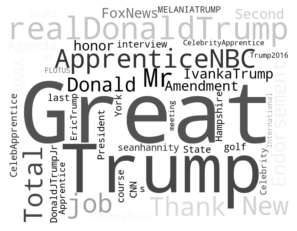

In [11]:
createCloud(Pos_Count)

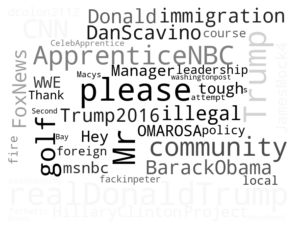

In [12]:
createCloud(Neg_Count)

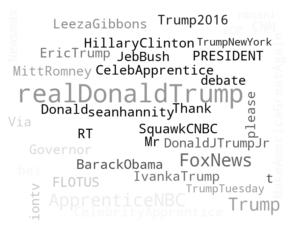

In [13]:
createCloud(Neu_Count)

## Graph visulizations

<AxesSubplot:>

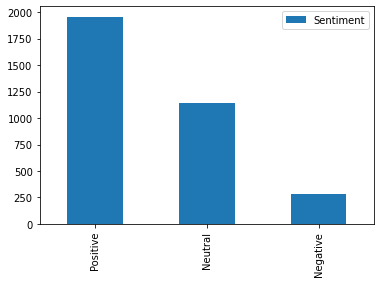

In [14]:
dataset = df2['Sentiment'].value_counts()
dframeRC = pd.DataFrame(dataset)
#outputs the dataframe as a bar chart
dframeRC.plot.bar()

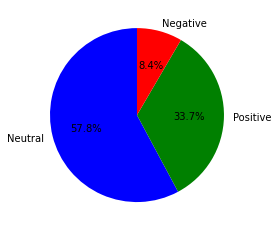

In [15]:
#outputs the dataframe as a pie chart
import matplotlib.pyplot as plt
slices_hours = [dframeRC['Sentiment'][0],dframeRC['Sentiment'][1],dframeRC['Sentiment'][2]]
activities = ['Neutral', 'Positive','Negative']
colors = ['b', 'g', 'r']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()


<AxesSubplot:xlabel='Year'>

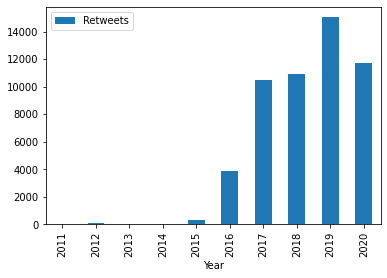

In [16]:
#shows the growth of donald trump from 2011 to 2020

def average(df):
    return int(sum(list(df['retweets'])) / len(list(df['retweets'])))

l = []
yearList = []
for x in range(10):
    l.append(average(df2[ df2['date'] == 2011 + x]))
    yearList.append(2011 + x)


l = {'Retweets' : l,
     'Year' : yearList}
    
    
df = pd.DataFrame(l)
df = df.set_index('Year')
df.plot.bar()

<AxesSubplot:xlabel='Year'>

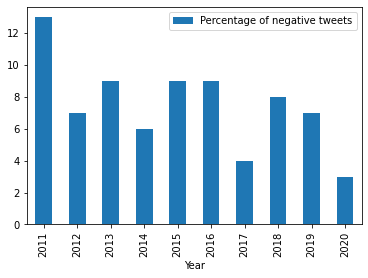

In [17]:
# graph to show the percentage of negative tweets over the years to see whehtere it has gone up or donw.

def percentageBadTweets(df):
    count = 0
    tweetValue = list(df['Sentiment'])
    for tweet in tweetValue:
        if tweet == "Negative":
            count = count + 1
    return int((count / len(df)) * 100)

yearList = []
l = []

for x in range(10):
    l.append(percentageBadTweets(df2 [ df2 ['date'] == 2011 + x]))
    yearList.append(2011 + x)
        
l = {'Percentage of negative tweets' : l,
     'Year' : yearList}


df = pd.DataFrame(l)
df = df.set_index('Year')
df.plot.bar()

<AxesSubplot:xlabel='Year'>

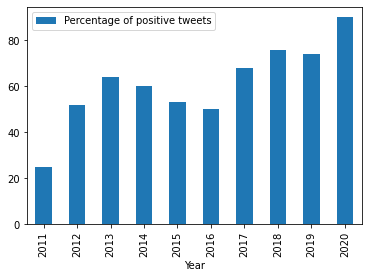

In [18]:
# graph to show the percentage of negative tweets over the years to see whehtere it has gone up or donw.

def percentagePositiveTweets(df):
    count = 0
    tweetValue = list(df['Sentiment'])
    for tweet in tweetValue:
        if tweet == "Positive":
            count = count + 1
    return int((count / len(df)) * 100)

yearList = []
l = []

for x in range(10):
    l.append(percentagePositiveTweets(df2 [ df2 ['date'] == 2011 + x]))
    yearList.append(2011 + x)
        
l = {'Percentage of positive tweets' : l,
     'Year' : yearList}


df = pd.DataFrame(l)
df = df.set_index('Year')
df.plot.bar()